In [1]:
#implement a email spam filtering using text classification algorithm with appropriate dataset.

In [86]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score
import nltk 
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns 


In [87]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [88]:
df=pd.read_csv('spam_ham_dataset.csv')

In [89]:
df.head()

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...


In [62]:
df

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...
...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...
5169,ham,Subject: industrial worksheets for august 2000...


In [93]:
df.describe()

,label,text
count,5171,5171
unique,2,4993
top,ham,Subject: calpine daily gas nomination\r\n>\r\n...
freq,3672,20


In [92]:
df.shape

(5171, 2)

In [94]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [95]:
df.columns

Index(['label', 'text'], dtype='object')

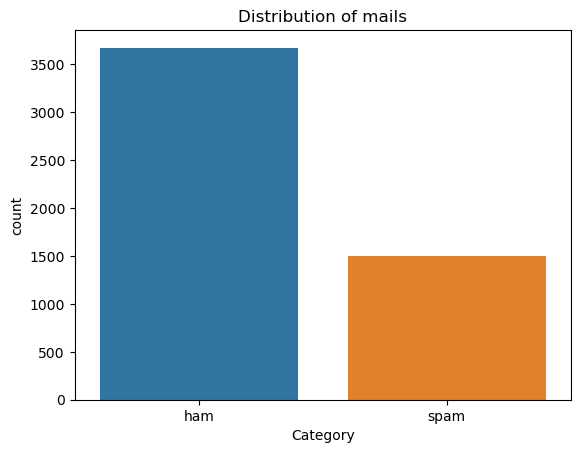

In [97]:
sns.countplot(data=df,x='label')
plt.xlabel('Category')
plt.ylabel('count')
plt.title('Distribution of mails')
plt.show()

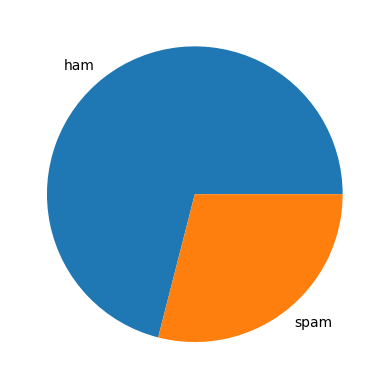

In [98]:
plt.pie(df['label'].value_counts(),labels=['ham','spam'])
plt.show()

In [99]:
#Data Preprocssing 
df.loc[df['label']=="spam","label"]=0
df.loc[df['label']=="ham","label"]=1

In [100]:
X=df['text']
y=df['label']
print(X)
print(y)

0       Subject: enron methanol ; meter # : 988291\r\n...
1       Subject: hpl nom for january 9 , 2001\r\n( see...
2       Subject: neon retreat\r\nho ho ho , we ' re ar...
3       Subject: photoshop , windows , office . cheap ...
4       Subject: re : indian springs\r\nthis deal is t...
                              ...                        
5166    Subject: put the 10 on the ft\r\nthe transport...
5167    Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168    Subject: calpine daily gas nomination\r\n>\r\n...
5169    Subject: industrial worksheets for august 2000...
5170    Subject: important online banking alert\r\ndea...
Name: text, Length: 5171, dtype: object
0       1
1       1
2       1
3       0
4       1
       ..
5166    1
5167    1
5168    1
5169    1
5170    0
Name: label, Length: 5171, dtype: object


In [101]:
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)
print(X_train.shape)
print(X_test.shape)

(4136,)
(1035,)


In [106]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fit the vectorizer on the training data
vectorizer = TfidfVectorizer()
X_train_features = vectorizer.fit_transform(X_train)

# Use the same vectorizer to transform the test data
X_test_features = vectorizer.transform(X_test)



In [107]:
model=LogisticRegression()
model.fit(X_train_features,y_train)


LogisticRegression()

In [108]:
predict_train_data=model.predict(X_train_features)
accuracy_train_data=accuracy_score(y_train,predict_train_data)
print("Accuracy on train data:",accuracy_train_data)

Accuracy on train data: 0.995889748549323


In [109]:
predict_test_data=model.predict(X_test_features)


In [111]:
accuracy_test_data=accuracy_score(y_test,predict_test_data)
print("Accuracy on test data:",accuracy_test_data)

Accuracy on test data: 0.9758454106280193


In [113]:
new_mail = ["Congratulations on your recent achievement! Well done."]
new_data_features = vectorizer.transform(new_mail)

# Make the prediction
prediction = model.predict(new_data_features)
print("Prediction:", prediction)


Prediction: [0]


In [114]:
if(prediction==0):
    print("Ham!")
else:
    print("Spam")

Ham!


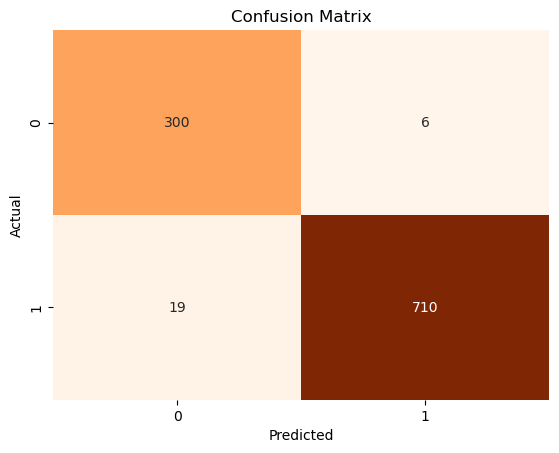

In [117]:
conf_matrix=confusion_matrix(y_test,predict_test_data)
plt.figure()
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Oranges',cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Confusion Matrix')
plt.show()